In [1]:
# import modules
import numpy as np

# import plotting modules
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

from IPython.display import Latex

%matplotlib inline

from matplotlib import gridspec
from NFW import NFW
from NFW_Z import NFW_Z

Remember: 500 solar masses is the mass per particle

In [2]:
bin_size = 0.02 # tis in kpc
starting_radius = 0.02 # tis in kpc

# THIS PART WORKS WITH NO RADIATIVE TRANSFER (NO RT)

In [3]:
전data290_noRT = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dwarf 1 no RT/dwarf_dm_5e8_0290.txt")

In [4]:
dx290_noRT = 전data290_noRT[:,4] / 1000 # converting pc to kpc
dy290_noRT = 전data290_noRT[:,5] / 1000 # converting pc to kpc
dz290_noRT = 전data290_noRT[:,6] / 1000 # converting pc to kpc
r290_noRT = np.sqrt(dx290_noRT**2 + dy290_noRT**2 + dz290_noRT**2) # max: 11.333935323605565 kpc, closest to 11.340 kpc
rad_array290_noRT = np.arange(starting_radius, 11.34, bin_size) # unit: kpc

density_profile290_noRT = np.zeros(np.size(rad_array290_noRT))
i = 0
for radius_value in rad_array290_noRT:
    particles = np.where((r290_noRT > radius_value) & (r290_noRT < (radius_value + bin_size)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + bin_size)**3 - radius_value**3)
    density_profile290_noRT[i] = how_many_particles / shell_volume * 500
    i += 1

In [5]:
mass_profile290_noRT = np.zeros(np.size(rad_array290_noRT))
h = 0
for radius_value in rad_array290_noRT:
    particles = np.where((r290_noRT < (radius_value + bin_size)))
    how_many_particles = np.size(particles)
    mass_profile290_noRT[h] = how_many_particles * 500
    h += 1

## generating 2 NFW profiles with 2 different masses.
## the one called "halo6" will be the main one running.

In [6]:
# the mass equals to the mass of the last data point that Jeon collected.

halo6 = NFW(mass_profile290_noRT[np.size(mass_profile290_noRT) - 1]) # NFW using total mass of the dwarf in the data file
r_s6 = halo6.r_s()
c_vir6 = halo6.c_vir()
print('r_s =', r_s6)
print('c_vir =', c_vir6)

r_s = 0.9768721189674222
c_vir = 18.041804676105194


In [7]:
# the mass is made up by Dr Besla to estimate m_vir

halo6_1 = NFW(2.85e8) # NFW using M_200 / 0.87
r_s6_1 = halo6_1.r_s()
c_vir6_1 = halo6_1.c_vir()
print('r_s =', r_s6_1)
print('c_vir =', c_vir6_1)

r_s = 0.9404201093284129
c_vir = 18.16826652958019


## plotting the density & mass profiles at this redshift (unnormalized)

In [8]:
'''this is to set in stone some of the variables we'll use later'''

# this finds density that best corresponds to the critical density
rho_crit = 140
deviation_from_rho_crit = abs(density_profile290_noRT - rho_crit)
index = np.where(deviation_from_rho_crit == min(deviation_from_rho_crit))
rad_at_rho_crit = rad_array290_noRT[index][0]

# this finds density that best corresponds to 200 times the critical density
density200 = rho_crit * 200
deviate = abs(density_profile290_noRT - density200)
ind = np.where(deviate == min(deviate))
rad200 = rad_array290_noRT[ind][0]
mass_at_200_times_rho_crit = mass_profile290_noRT[ind][0] 

# this defines the NFW profile
density_profile6 = halo6.rho(rad_array290_noRT)
density_profile6_1 = halo6_1.rho(rad_array290_noRT)

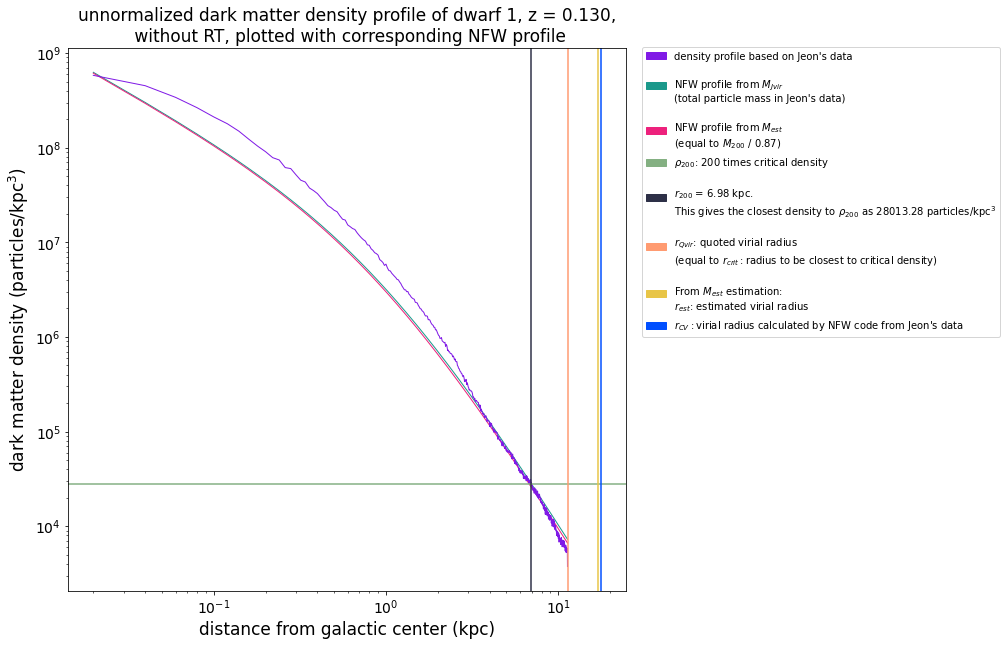

In [9]:
'''PLOTTING THE DENSITY PROFILE'''

fig, ax = plt.subplots(figsize=[10, 10])

plt.plot(rad_array290_noRT, density_profile6, color='#1B998B', linewidth=1)
plt.plot(rad_array290_noRT, density_profile6_1, color='#ED217C', linewidth=1)
plt.plot(rad_array290_noRT, density_profile290_noRT, color=(0.5, 0.1, 0.9, 1), linewidth=1)
plt.axhline(200 * rho_crit, color='#84B082')
plt.axvline(rad200, color='#2D3047')
plt.axvline(1.133394e+04 * 0.001, color='#FF9B71')
plt.axvline(halo6_1.r_vir(), color='#E8C547')
plt.axvline(halo6.r_vir(), color='#004FFF')
notec = mpatches.Patch(color=(0.5, 0.1, 0.9, 1), label="density profile based on Jeon's data")
notea = mpatches.Patch(color='#1B998B', label="\nNFW profile from $M_{Jvir}$\n(total particle mass in Jeon's data)")
noteb = mpatches.Patch(color='#ED217C', label="\nNFW profile from $M_{est}$\n(equal to $M_{200}$ / 0.87)")
note0 = mpatches.Patch(color='#84B082', label="$ρ_{200}$: 200 times critical density")
note1 = mpatches.Patch(color='#2D3047', label="\n$r_{200}$ = " + str(round(rad200, 2)) + " kpc.\nThis gives the closest density to $ρ_{200}$ as " + \
str(round(density_profile290_noRT[ind][0], 2)) + " particles/kpc$^3$")
note2 = mpatches.Patch(color='#FF9B71', label="\n$r_{Qvir}$: quoted virial radius\n(equal to $r_{crit}:$radius to be closest to critical density)")
note3 = mpatches.Patch(color='#E8C547', label="\nFrom $M_{est}$ estimation:\n$r_{est}$: estimated virial radius")
note4 = mpatches.Patch(color='#004FFF', label="$r_{CV}:$virial radius calculated by NFW code from Jeon's data")
plt.legend(handles=[notec, notea, noteb, note0, note1, note2, \
                    note3, note4], bbox_to_anchor=(1.02, 1.01), loc='upper left')

plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('dark matter density (particles/kpc$^3$)', fontsize=17) # using LATEX here!
plt.title('unnormalized dark matter density profile of dwarf 1, z = 0.130,\n without RT, plotted with corresponding NFW profile', loc='center', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')    

plt.show()

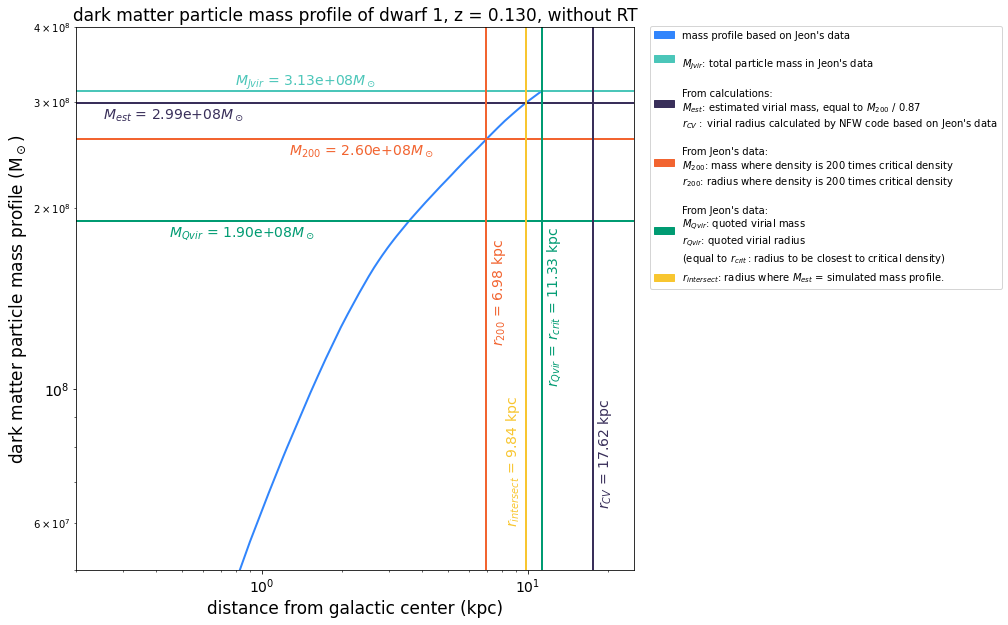

In [10]:
'''PLOTTING THE MASS PROFILE'''

plt.figure(figsize=(10,10))

# the main plot from Jeon's data
plt.plot(rad_array290_noRT, mass_profile290_noRT, color='#3185FC', linewidth=2)

# ADDITIONAL NOTES: find where M_est = simulated mass profile
difference_from_massprof_noRT = abs(mass_profile290_noRT - mass_at_200_times_rho_crit / 0.87)
location = np.where(difference_from_massprof_noRT == min(difference_from_massprof_noRT))
intersecting_radius_noRT = rad_array290_noRT[location][0]

# all the horizontal lines
plt.axhline(mass_profile290_noRT[np.size(mass_profile290_noRT) - 1], color='#4BC6B9', linewidth=2)
plt.axhline(1.903021e+08, color='#009B72', linewidth=2)
plt.axhline(mass_at_200_times_rho_crit / 0.87, color='#392F5A', linewidth=2)
plt.axhline(mass_at_200_times_rho_crit, color='#F26430', linewidth=2)

# all the vertical lines
plt.axvline(1.133394e+04 * 0.001, color='#009B72', linewidth=2) #r_vir quoted by Jeon
plt.axvline(intersecting_radius_noRT, color='#F8C630', linewidth=2) #radius where M_est meets the simulated mass profile
plt.axvline(rad200, color='#F26430', linewidth=2) #r200
plt.axvline(halo6.r_vir(), color='#392F5A', linewidth=2) #r_vir from calculations

# separate legends
legend1 = mpatches.Patch(color='#3185FC', label="mass profile based on Jeon's data")

legend2 = mpatches.Patch(color='#4BC6B9', label="\n$M_{Jvir}$: total particle mass in Jeon's data")
legend3 = mpatches.Patch(color='#392F5A', label="\nFrom calculations:\n$M_{est}$: estimated virial mass, equal to $M_{200}$ / 0.87\n$r_{CV}:$ virial radius calculated by NFW code based on Jeon's data")
legend4 = mpatches.Patch(color='#F26430', \
                         label="\nFrom Jeon's data:\n$M_{200}$: mass where density is 200 times critical density\n$r_{200}$: radius where density is 200 times critical density")
legend5 = mpatches.Patch(color='#009B72', \
                         label="\nFrom Jeon's data:\n$M_{Qvir}$: quoted virial mass\n$r_{Qvir}$: quoted virial radius\n(equal to $r_{crit}:$radius to be closest to critical density)")
legend6 = mpatches.Patch(color='#F8C630', label="$r_{intersect}$: radius where $M_{est}$ = simulated mass profile.")

plt.legend(handles=[legend1, legend2, legend3, legend4, legend5, legend6], bbox_to_anchor=(1.02, 1.01), loc='upper left')
    
plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('dark matter particle mass profile (M$_\odot$)', fontsize=17) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(10**-0.7, 10**1.4)
plt.ylim(5e7, 4e8)
plt.xscale('log')
plt.yscale('log')    

plt.title('dark matter particle mass profile of dwarf 1, z = 0.130, without RT', loc='center', fontsize=17)

plt.text(10**-0.1, 10**8.505, '''$M_{Jvir}$ = ''' + str(format(mass_profile290_noRT[np.size(mass_profile290_noRT) - 1], '.2e')) + \
         '''$M_\odot$''', fontsize=14, color='#4BC6B9')
plt.text(10**-0.6, 10**8.451, '''$M_{est}$ = ''' + str(format(mass_at_200_times_rho_crit / 0.87, '.2e')) + \
         '''$M_\odot$''', fontsize=14, color='#392F5A')
plt.text(10**0.1, 10**8.391, '''$M_{200}$ = ''' + str(format(mass_at_200_times_rho_crit, '.2e')) + \
         '''$M_\odot$''', fontsize=14, color='#F26430')
plt.text(10**-0.35, 10**8.255, '''$M_{Qvir}$ = ''' + str(format(1.903021e+08, '.2e')) +  '''$M_\odot$''', \
         fontsize=14, color='#009B72')

plt.text(10**0.859, 10**8.08, '''$r_{200}$ = ''' + str(round(rad200, 2)) + ''' kpc''', \
         rotation=90, fontsize=14, color='#F26430')
plt.text(10**0.909, 10**7.78, '''$r_{intersect}$ = ''' + str(round(intersecting_radius_noRT, 2)) + ''' kpc''', \
         rotation=90, fontsize=14, color='#F8C630') 
plt.text(10**1.065, 10**8.013, '''$r_{Qvir}$ = $r_{crit}$ = ''' + str(round(1.133394e+04 * 0.001, 2)) + ''' kpc''', \
         rotation=90, fontsize=14, color='#009B72')
plt.text(10**1.255, 10**7.81, '''$r_{CV}$ = ''' + str(round(halo6.r_vir(), 2)) + ''' kpc''', \
         rotation=90, fontsize=14, color='#392F5A')

plt.show()

## plotting average NFW density profiles with different virial masses (M_vir)

In [14]:
M_Jvir = int(mass_profile290_noRT[np.size(mass_profile290_noRT) - 1])

### these are the ordinary density profile plots

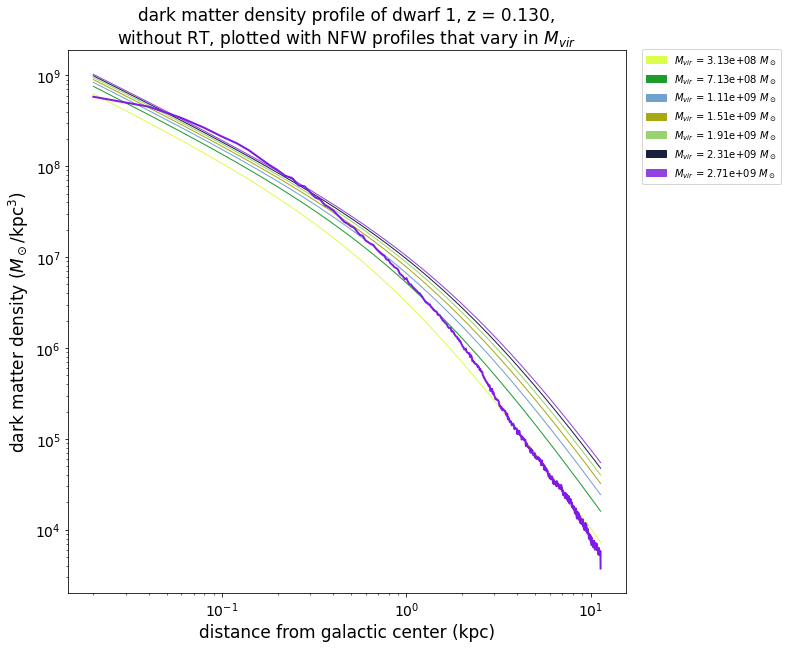

In [12]:
plt.figure(figsize=(10,10))

all_the_legends = []

for virial_mass in range(M_Jvir, int(3e9), int(4e8)):
    new_halo = NFW(virial_mass)
    NFW_profile = new_halo.rho(rad_array290_noRT)
    r = np.random.random()
    g = np.random.random()
    b = np.random.random()
    plt.plot(rad_array290_noRT, NFW_profile, color=(r, g, b), linewidth=1)
    each_legend = mpatches.Patch(color=(r, g, b), label='$M_{vir}$ = ' + format(virial_mass, '.2e') + " $M_\odot$")
    all_the_legends.append(each_legend)

plt.plot(rad_array290_noRT, density_profile290_noRT, color=(0.5, 0.1, 0.9, 1), linewidth=2)

plt.legend(handles=all_the_legends, bbox_to_anchor=(1.02, 1.01), loc='upper left')

plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('dark matter density ($M_\odot$/kpc$^3$)', fontsize=17) # using LATEX here!
plt.title('dark matter density profile of dwarf 1, z = 0.130,\nwithout RT, plotted with NFW profiles that vary in $M_{vir}$', loc='center', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')    

plt.show()

### these are the ratio plots

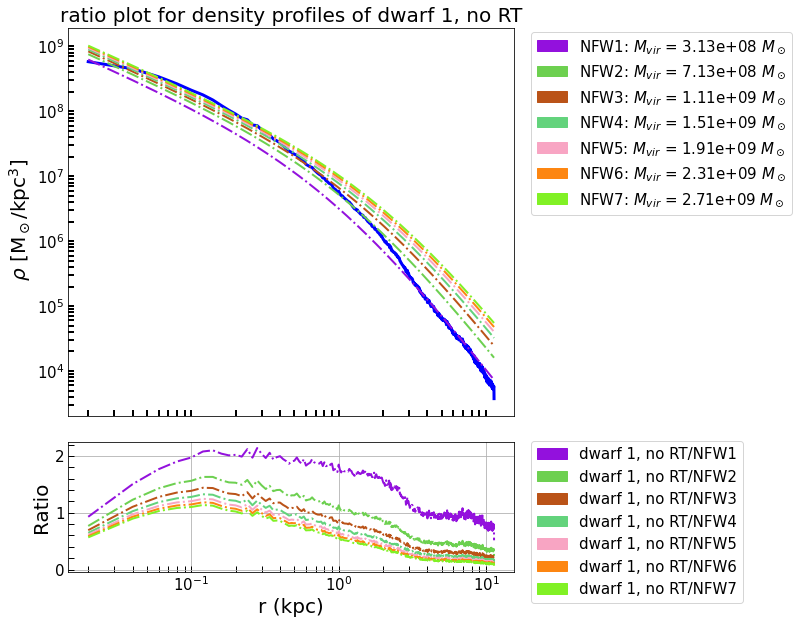

In [15]:
fig = plt.figure(figsize=(8, 10)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) # row, columns, widths

ax0 = plt.subplot(gs[0]) # top plot
ax1 = plt.subplot(gs[1]) # bottom plot

# TOP PLOT

fig.subplots_adjust(hspace=0.1)  

ax0.loglog(rad_array290_noRT, density_profile290_noRT, 'b', lw=3, label="dwarf 1, no RT")

top_legends = []
bottom_legends = []

i = 1

for virial_mass in range(M_Jvir, int(3e9), int(4e8)):
    new_halo = NFW(virial_mass)
    NFW_profile = new_halo.rho(rad_array290_noRT)
    r = np.random.random()
    g = np.random.random()
    b = np.random.random()
    ax0.loglog(rad_array290_noRT, NFW_profile, color=(r, g, b), linestyle='-.', lw=2)
    ax1.plot(rad_array290_noRT, density_profile290_noRT / NFW_profile, color=(r, g, b), linestyle='-.', lw=2)
    
    # top legends
    upper_label = mpatches.Patch(color=(r, g, b), label='NFW' + str(i) + ': $M_{vir}$ = ' + \
                                 format(virial_mass, '.2e') + " $M_\odot$")
    top_legends.append(upper_label)
    
    # bottom legends
    lower_label = mpatches.Patch(color=(r, g, b), label='dwarf 1, no RT/NFW' + str(i))
    bottom_legends.append(lower_label)
    i += 1
        
ax0.minorticks_on()

ax0.set_title('ratio plot for density profiles of dwarf 1, no RT', fontsize=20)
ax0.set_xticklabels([]) # ignore the x label
ax0.set_ylabel(r' $\rho$ [M$_\odot$/kpc$^3$] ', fontsize=20)
ax0.tick_params(axis='both', which='both', direction='in',length=6, width=2)

ax0.legend(handles=top_legends, bbox_to_anchor=(1.02, 1.01), loc='upper left')
ax1.legend(handles=bottom_legends, bbox_to_anchor=(1.02, -0.3), loc='lower left')

plt.xscale('log')

ax1.set_ylabel('Ratio',fontsize=20)
ax1.set_xlabel('r (kpc)', fontsize=20)

ax1.grid()
ax1.minorticks_on()
ax1.tick_params(axis='both', which='both', direction='in',length=6, width=1)

plt.rcParams.update({'font.size': 15})